In [1]:
# Session 27 -  k-Nearest Neighbors  Assignment by Sreedhara Jagatagar  Sreenivasa

#In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players 
#scored in the 2013-2014 season.  

#A look at the data 
#Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how 
#a player performed in the 2013-2014 NBA season. 

#Download 'nba_2013.csv' file from this link:  
#https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 

#Here are some selected columns from the data: 

#player - name of the player 
#pos - the position of the player 
#g - number of games the player was in 
#gs - number of games the player started 
#pts - total points the player scored 

#There are many more columns in the data, mostly containing information about average player game performance over 
#the course of the season. See this site for an explanation of the rest of them. 
#We can read our dataset in and figure out which columns are present: 

#import pandas with open("nba_2013.csv", 'r') as csvfile: 

### Import Libraries
### Load Data
### Analyze Data
### Clean Data
### Split Data
### Choose Important Feature
### Find K-Value
### Fit, Predict and Show the Predicted value


# Import Libraries

In [2]:
#Import Libararies
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
#from sklearn.cross_validation import train_test_split
from sklearn import metrics, model_selection, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Import visulization Library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.5)

In [3]:
#Load Data
columns=['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_2', 'x3p', 'x3pa', 'x3p_2', 'x2p', 'x2pa', 'x2p_2', 'efg_2', 'ft',
       'fta', 'ft_2', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end']

ply_data=pd.read_csv('nba_2013.csv', header=None,skiprows=1)
ply_data.columns=columns
ply_data_final=ply_data

#Display Data
ply_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_2,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


# Analyze Data

In [93]:
#Analyze Data to see the number of Rows
ply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg_2            479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p_2           414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p_2           478 non-null float64
efg_2           479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft_2            461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [94]:
#Describe the data 
ply_data.describe()

,age,g,gs,mp,fg,fga,fg_2,x3p,x3pa,x3p_2,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [95]:
#Check whether data having Null values
print(ply_data.count().sum())
ply_data.isna().sum()

14817


player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg_2             2
x3p              0
x3pa             0
x3p_2           67
x2p              0
x2pa             0
x2p_2            3
efg_2            2
ft               0
fta              0
ft_2            20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

# Clean Data

In [96]:
#check and Fill with mean values
print(ply_data.fg_2.mean())
print(ply_data.x3p_2.mean())
print(ply_data.x2p_2.mean())
print(ply_data.efg_2.mean())
print(ply_data.ft_2.mean())
ply_data.fg_2.fillna(0.4364, inplace=True)
ply_data.x3p_2.fillna(0.2851, inplace=True)
ply_data.x2p_2.fillna(0.4669, inplace=True)
ply_data.efg_2.fillna(0.4669, inplace=True)
ply_data.ft_2.fillna(0.4669, inplace=True)

0.43643632567849694
0.2851111897859946
0.46694717560626514
0.48075156576200395
0.7224186550976138


In [97]:
#Check whether data having Null values
#print(ply_data.count())
ply_data.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg_2            0
x3p             0
x3pa            0
x3p_2           0
x2p             0
x2pa            0
x2p_2           0
efg_2           0
ft              0
fta             0
ft_2            0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [98]:
#Show the number fields in the data
ply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg_2            481 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p_2           481 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p_2           481 non-null float64
efg_2           481 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft_2            481 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [99]:
#Convert Categorical Vairales to dummy variables
ply_data=ply_data.join(pd.get_dummies(ply_data['pos'], prefix='pos'))

#Drop all unwanted variables
ply_data.drop(['season','season_end','player','pos','bref_team_id'], axis=1, inplace=True)

In [100]:
#Separate Target and Independata variables.
y=ply_data.pop('pts')
X=ply_data
#ply_data.columns

In [101]:
y.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

In [102]:
X.head()

,age,g,gs,mp,fg,fga,fg_2,x3p,x3pa,x3p_2,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,0,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.285100,...,57,71,203,1,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.285100,...,36,39,108,0,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,0,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,1,0,0,0,0,0,0


# Split the data for Train and Test

In [103]:
#Split the test and traind ata
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 100)

In [104]:
#Choose only im
imp_cols=['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_2', 'x3p', 'x3pa', 'x3p_2', 'x2p', 'x2pa', 'x2p_2', 'efg_2', 'ft', 'fta', 'ft_2', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pos_C','pos_F','pos_G','pos_PF','pos_PG','pos_SF','pos_SG']

In [105]:
X_train.head()

,age,g,gs,mp,fg,fga,fg_2,x3p,x3pa,x3p_2,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
328,31,68,68,2179,294,747,0.394,136,391,0.347826,...,5,166,146,0,0,0,0,1,0,0
252,32,45,4,857,82,160,0.513,1,5,0.200000,...,19,54,65,0,0,0,1,0,0,0
229,29,73,73,2553,700,1376,0.509,3,15,0.200000,...,79,124,176,1,0,0,0,0,0,0
127,27,49,8,1016,111,252,0.440,51,132,0.386364,...,16,36,61,0,0,0,0,0,1,0
188,33,34,0,511,82,207,0.396,34,100,0.340000,...,0,34,72,0,0,0,1,0,0,0


In [106]:
X_test.head()

,age,g,gs,mp,fg,fga,fg_2,x3p,x3pa,x3p_2,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
175,23,82,12,1797,187,459,0.407,55,165,0.333333,...,72,91,231,0,0,0,0,0,1,0
406,29,59,50,1271,181,346,0.523,0,3,0.000000,...,31,75,117,1,0,0,0,0,0,0
331,30,54,1,540,60,146,0.411,52,122,0.426230,...,4,5,44,0,0,0,1,0,0,0
29,31,20,0,368,56,131,0.427,7,25,0.280000,...,4,19,30,0,0,0,0,1,0,0
398,23,11,0,100,18,28,0.643,0,0,0.285100,...,2,5,17,1,0,0,0,0,0,0


In [107]:
y_train.head()

328     820
252     226
229    1594
127     339
188     225
Name: pts, dtype: int64

In [108]:
y_test.head()

175    511
406    483
331    178
29     150
398     38
Name: pts, dtype: int64

# Choose Important Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

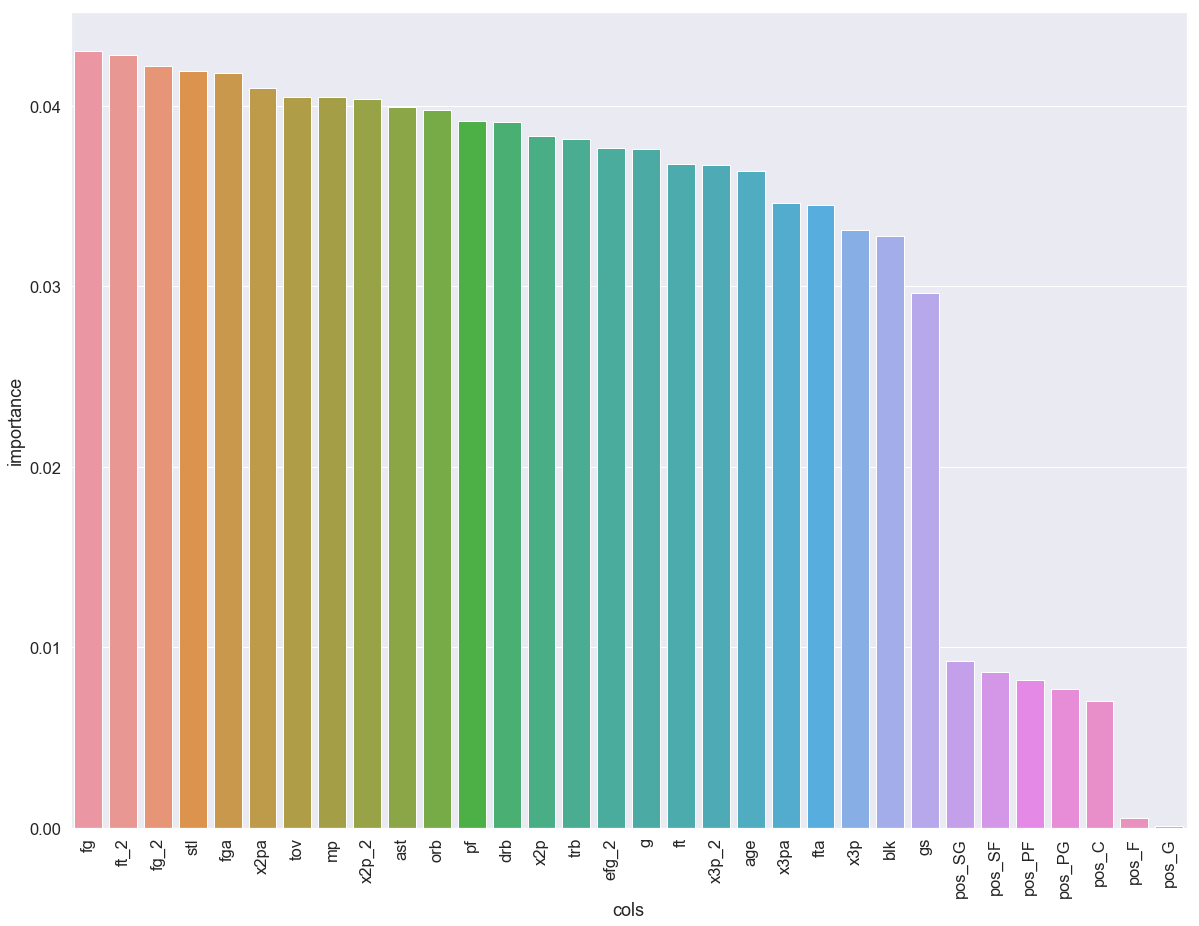

In [109]:
#Feature Selection
#Identify feature improtance and plot them using Seaborn Libraray
#Use RandomForest algoritham for Feature selections
rndf = RandomForestClassifier(n_estimators=150)

#Fit the modole using train data set
rndf.fit(X_train[imp_cols], y_train)

importance = pd.DataFrame.from_dict({'cols':imp_cols, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [126]:
#Have a Thresholds and choose feature having higher importances
imp_cols = importance[importance.importance >= 0.02].cols.values
print(imp_cols)
#imp_cols=['pos_C','pos_F','pos_G','pos_PF','pos_PG','pos_SF','pos_SG','g','gs','fg','fga','x2pa','mp','age','ft']
#imp_cols=['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_2', 'x3p', 'x3pa', 'x3p_2', 'x2p', 'x2pa', 'x2p_2', 'efg_2', 'ft', 'fta', 'ft_2', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']

['fg' 'ft_2' 'fg_2' 'stl' 'fga' 'x2pa' 'tov' 'mp' 'x2p_2' 'ast' 'orb' 'pf'
 'drb' 'x2p' 'trb' 'efg_2' 'g' 'ft' 'x3p_2' 'age' 'x3pa' 'fta' 'x3p' 'blk'
 'gs']


# Find K-Value

In [122]:
#Find the accruacy for different K Values and show the same.
for K in range(6):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train[imp_cols], y_train) 
    y_pred = neigh.predict(X_test[imp_cols])
    print("Accuracy is ", (y_pred.sum()/y_test.sum())*100,"% for K-Value:",K_value)

Accuracy is  99.25413383496232 % for K-Value: 1
Accuracy is  92.05593338507478 % for K-Value: 2
Accuracy is  88.20689564450993 % for K-Value: 3
Accuracy is  85.52467146371302 % for K-Value: 4
Accuracy is  83.35679238085216 % for K-Value: 5
Accuracy is  80.81400702455966 % for K-Value: 6


# Fit, Predict and Display Data

In [127]:
#predict for the test data using  K =3 and find the accruacy
neigh = KNeighborsClassifier(n_neighbors = 3, weights='uniform', algorithm='auto')
neigh.fit(X_train[imp_cols], y_train)
y_pred=neigh.predict(X_test[imp_cols])
print("Accuracy is ", (y_pred.sum()/y_test.sum())*100,"% for K-Value:",3)

Accuracy is  88.20689564450993 % for K-Value: 3


In [128]:
#store predicted values
X_test['Actual_pts']=y_test
X_test['Predicted_pts']=y_pred


C:\Sreedhara\DataScientist\Install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Sreedhara\DataScientist\Install\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
#Show Actual and Predcited values to compare
X_test.head(100)

,age,g,gs,mp,fg,fga,fg_2,x3p,x3pa,x3p_2,...,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG,Actual_pts,Predicted_pts
175,23,82,12,1797,187,459,0.4070,55,165,0.333333,...,231,0,0,0,0,0,1,0,511,525
406,29,59,50,1271,181,346,0.5230,0,3,0.000000,...,117,1,0,0,0,0,0,0,483,401
331,30,54,1,540,60,146,0.4110,52,122,0.426230,...,44,0,0,0,1,0,0,0,178,177
29,31,20,0,368,56,131,0.4270,7,25,0.280000,...,30,0,0,0,0,1,0,0,150,140
398,23,11,0,100,18,28,0.6430,0,0,0.285100,...,17,1,0,0,0,0,0,0,38,14
419,27,75,0,638,51,141,0.3620,6,29,0.206897,...,72,0,0,0,0,0,0,1,138,144
169,30,19,0,279,37,108,0.3430,8,29,0.275862,...,18,0,0,0,0,0,0,1,99,89
241,33,20,6,236,31,68,0.4560,28,54,0.518519,...,6,0,0,0,0,0,1,0,97,54
166,31,5,0,34,3,8,0.3750,0,2,0.000000,...,5,0,0,0,0,0,1,0,6,6
103,21,15,0,100,12,33,0.3640,6,14,0.428571,...,10,0,0,0,0,0,0,1,33,15
